In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import joblib

In [2]:
## Load the Cancer Dataset
fileName = 'Cancer_Data.csv'
cancer_dataset = pd.read_csv(fileName)

In [3]:
# Data head, Example of what the data looks like
print(cancer_dataset.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
# shape
print(cancer_dataset.shape)

(569, 33)


In [5]:
# Check data integrity (missing data)
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Distribution of benign and malignant case
print(cancer_dataset.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


In [7]:
#List of attributes
print(cancer_dataset.keys())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [8]:
#Drop unnecessary data entry for visualisaiton and re-examine the dataset
cancer_dataset.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
print(cancer_dataset.columns)
print(cancer_dataset.shape)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
(569, 31)


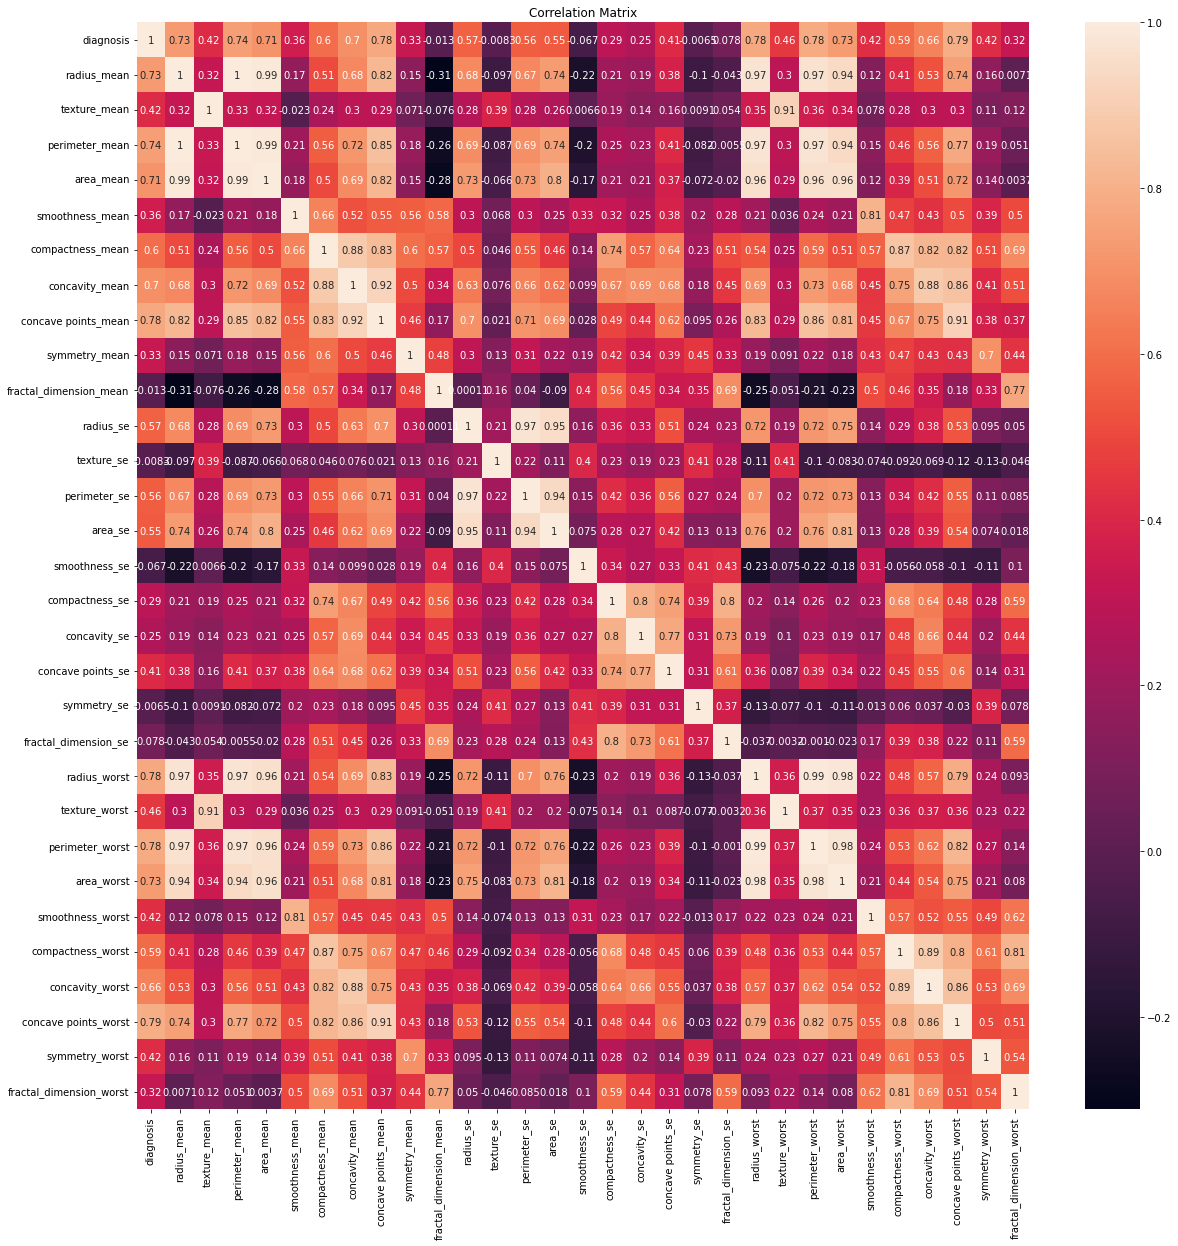

In [9]:
# Heat map
#Replace string B&M to binary 0, 1
cancer_dataset['diagnosis'] = cancer_dataset['diagnosis'].replace({'B': 0, 'M':1})
plt.subplots(figsize=(20, 20)) #Set size of the heat map
sns.heatmap(cancer_dataset[cancer_dataset.columns].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

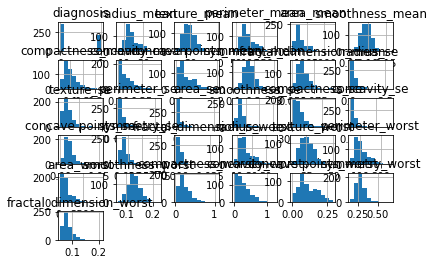

In [10]:
# Distribution of each attribute
cancer_dataset.hist()
plt.show()


In [11]:
## Preparing the data for analysis
X = cancer_dataset.drop('diagnosis', axis = 1) #Everything except the diagnosis column
y = cancer_dataset['diagnosis'] # The diagnosis column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
## Test run of analysis using Support vector machine
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
Precision: 0.9514695830485304
Recall: 0.9473684210526315
F1-score: 0.9464615931721194
[[71  0]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [13]:
# Feature scaling
# SVM with scaled data, proves that scaled data help the algorithm significantly 95% to 97%
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_with_scaled_data = SVC()
model_with_scaled_data.fit(scaled_X_train, y_train)
new_y_pred = model_with_scaled_data.predict(scaled_X_test)

print("Accuracy:",metrics.accuracy_score(y_test, new_y_pred))
print("Precision:",metrics.precision_score(y_test, new_y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, new_y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, new_y_pred, average = 'weighted'))
print(confusion_matrix(y_test, new_y_pred))
print(classification_report(y_test, new_y_pred))


Accuracy: 0.9824561403508771
Precision: 0.9829367940398942
Recall: 0.9824561403508771
F1-score: 0.9823691172375383
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



KNN: 0.966812 (0.026741)
CART: 0.929517 (0.032688)
NB: 0.923092 (0.044036)
SVM: 0.978068 (0.016841)


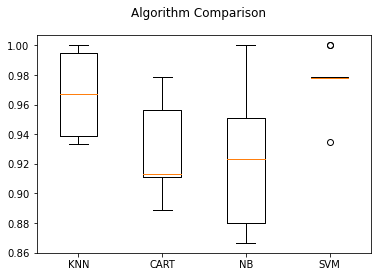

In [14]:
## Using k-fold cross validation to test out different model and avoid over-fitting

#Model collection
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
## Hyper parameter tuning for the best result

# hyper parameter of current better model
better_model = models[3][1]
params = better_model.get_params()
print(params)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# Find optimal hyper parameter for this model
params_grid = {'C':[10, 5, 1, 0.5, 0.1, 0.01],
                'gamma':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1],
                  'kernel': ['rbf'],
                  'probability': [True]}
grs = GridSearchCV(better_model, params_grid, refit = True, verbose = 1, cv = 20)
grs.fit(scaled_X_train, y_train)

# Display hyper parameter changes
print ("\n Best Hyper Parameters: ", grs.best_params_,"\n", "Best estimator: ", grs.best_estimator_,"\n")

Fitting 20 folds for each of 42 candidates, totalling 840 fits


In [ ]:
# Train model with hyper parameter tuned
model_best = grs.best_estimator_
y_prediction = model_best.predict(scaled_X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_prediction))
print("Precision:",metrics.precision_score(y_test, y_prediction, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_prediction, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_prediction, average = 'weighted'))
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

In [ ]:
## Save the trained model
saveFile = 'Best_SVM_Model.sav'
joblib.dump(model_best, saveFile)

In [ ]:
# Load the model to make sure it is saved properly
loaded_model = joblib.load(saveFile)
final_y_pred = loaded_model.predict(scaled_X_test)
print("Accuracy:",metrics.accuracy_score(y_test, final_y_pred))
print("Precision:",metrics.precision_score(y_test, final_y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, final_y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, final_y_pred, average = 'weighted'))
print(confusion_matrix(y_test, final_y_pred))
print(classification_report(y_test, final_y_pred))

In [ ]:
# install Lime library for model intepretation
try:
  import lime
except:
  print("Installing LIME")
  !pip install lime

In [ ]:
from lime import lime_tabular

exp = lime_tabular.LimeTabularExplainer(scaled_X_train, 
                                        class_names= ['benign', 'maglinant'], 
                                        feature_names= X,
                                        mode = 'classification' )

explanation_first = exp.explain_instance(scaled_X_test[0], loaded_model.predict_proba,
                                   num_features = len(X),
                                   top_labels = 1)
explanation_first.show_in_notebook()

In [ ]:
explanation_second = exp.explain_instance(scaled_X_test[113], loaded_model.predict_proba,
                                   num_features = len(X),
                                   top_labels = 1)
explanation_second.show_in_notebook()

In [ ]:
y_test